# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования**:

1. Изучить параметры объектов недвижимости
2. Изучить, как быстро продавались квартиры
3. Изучить, зависит ли цена от разных факторов
4. Изучить среднюю цену 1 м^2 квартиры
5. Посмотреть влияние расстояние от центра города на цену квартиры

**Ход исследования**

Необходимо проверить данные на ошибки и оценить их влияние на исследование. Затем, на этапе предобработки искать возможность исправить самые критичные ошибки данных. Добавить новые данные, необходимые в дальнейшем для исследования и провести исследовательский анализ.

Таким образом, исследование пройдёт в четыре этапа:

1. Обзор данных.
2. Предобработка данных.
3. Добавление новых данных и исследовательский анализ.
4. Изучение параметров, указанных в цели работы.

### Откройте файл с данными и изучите общую информацию. 

#### Добвляем необходимые библиотеки

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Загружаем файл и изучаем информацию

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #данные разделены \t
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

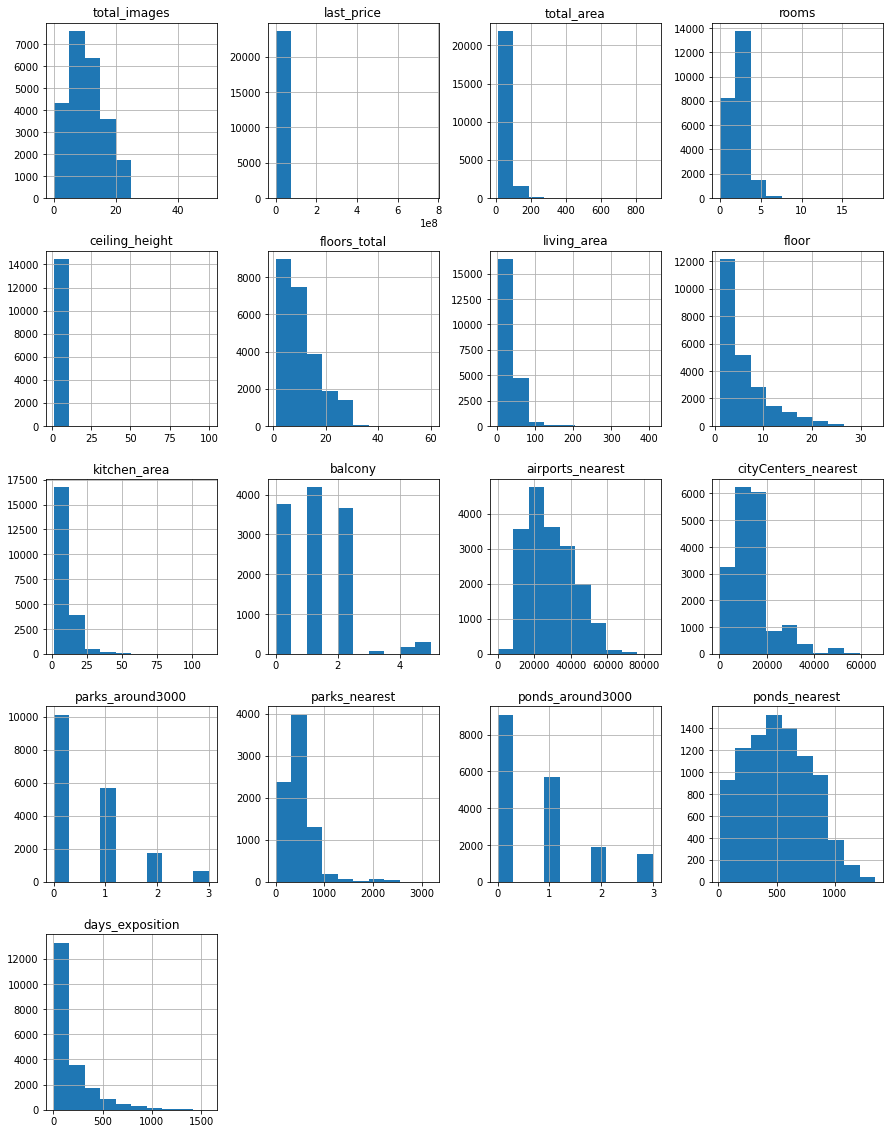

In [5]:
data.hist(figsize=(15, 20));

### Предобработка данных

#### Найдем и изучим пропущенные значения в столбцах

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

* В пропущенных ячейках ceiling_height, floors_total, living_area, kitchen_area можно указать медианные значения этих показетелей. Видимо продавец забыл указать эти данные либо не захотел заполнять. Также living_area зависит от количества комнат в квартире, поэтому можно указать медианное значения в зависмоти от кол-ва комнат.
* Незаполненные значения balcony можно обозначить 0, потому что если продавец их не указал, то скорее всего их нет.
* Пропущенные ячейки days_exposition возможно произошли из-зи технической ошибки или данную квартиру так никто и не купил, можно оставить без изменений. 
* Всевозможные парки, пруды и аэропорты поблизости были незаполнены скорее всего из-за незнания продавца или большой дальности, не меняем.
* Трудно определить из-за чего не указано locality_name, пропущенных значений не так много, возможно человеческий фактор. Оставляем без изменений. 
* Булевы пропущенные значения is_apartment можно поменять на 0. Скорее всего продавец не указал этот параметр, потому что квартира не относится к апартаментам или это не так важно.

In [7]:
data['balcony'] = data['balcony'].fillna(0)
data['living_area'] = data['living_area'].fillna(data.groupby(['rooms'])['living_area'].transform('median'))
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())
data['is_apartment'] = data['is_apartment'].fillna(False)

In [9]:
data.isna().sum() #проверяем, что все необходимые пропущенные значения были убраны

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Изменение типов данных в столбцах

* first_day_exposition: float64 --> datetime64
* floors_total, last_price, balcony: float64 --> int64
* is_apartment: object --> bool

In [10]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['floors_total'] = data['floors_total'].astype(int)
data['last_price'] = data['last_price'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['is_apartment'] = data['is_apartment'].astype(bool)

In [11]:
data.info() #проверяем изменения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

* first_day_exposition изменяем на тип datetime64, чтобы потом удобнее было работать.
* floors_total, last_price, balcony изменяем на тип int64, нет пропущенных значений, и все значения будут целыми.
* is_apartment изменяем на тип bool, нет пропущенных значений, и все значения 0 и 1. 

#### Обработка дубликатов

In [12]:
data.duplicated().sum() #проверяем явные дубликаты

0

In [13]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Мешают все дополнительные названия, которые создают неявные дубликаты.

In [14]:
words= ['село', 'садовое', 'товарищество', 'городской', 'посёлок', 'поселок', 'типа', 'городского', 'деревня', 'коттеджный', 'садоводческое', 'некоммерческое']

for i in range(len(data['locality_name'])):
    data.loc[i, 'locality_name'] = ' '.join([x for x in str(data.loc[i, 'locality_name']).split() if x not in words])

In [15]:
data['locality_name'].unique() #проверяем изменения

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

#### Обработка аномальных значений

In [14]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,11.0,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,9.1,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


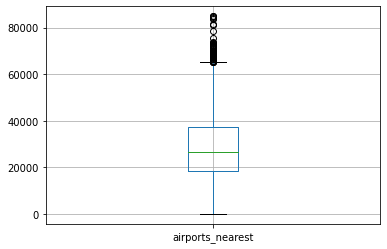

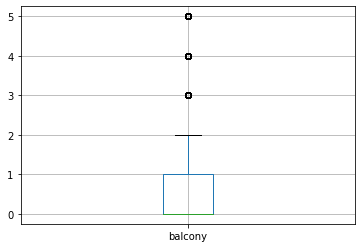

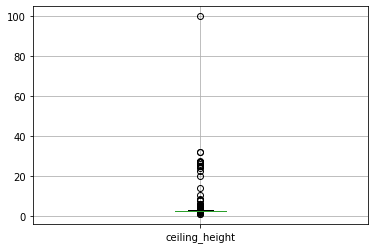

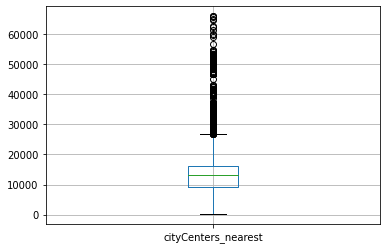

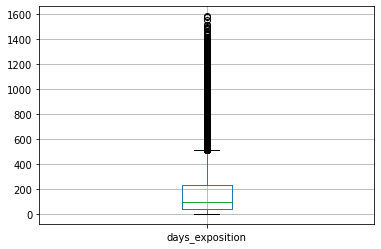

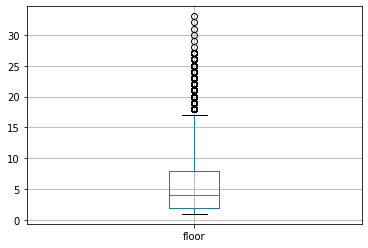

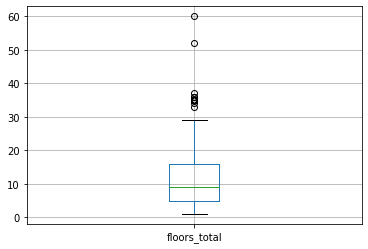

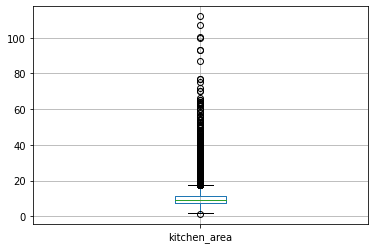

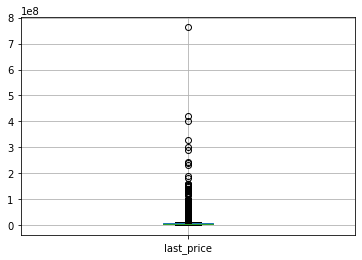

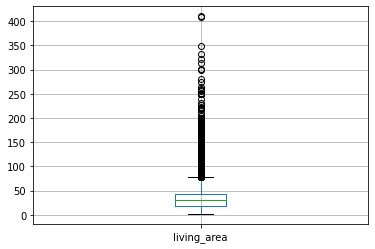

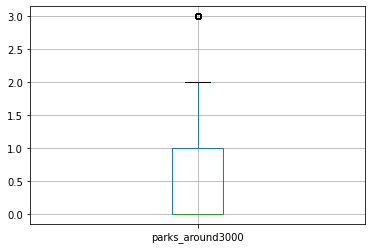

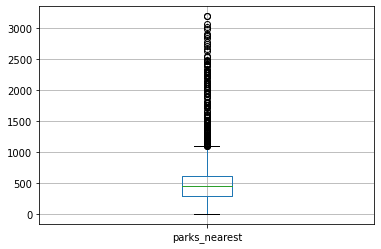

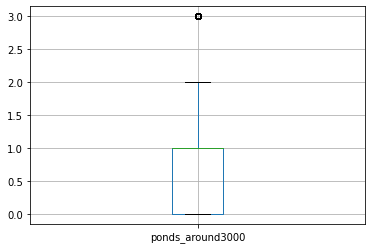

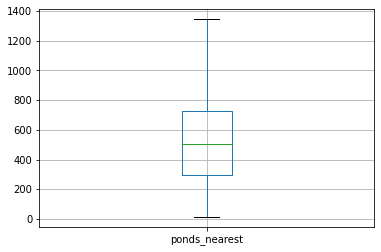

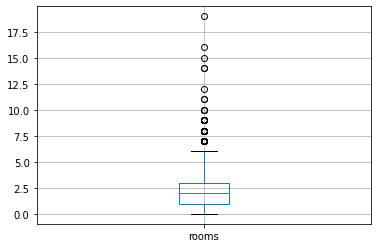

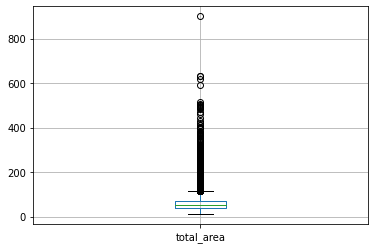

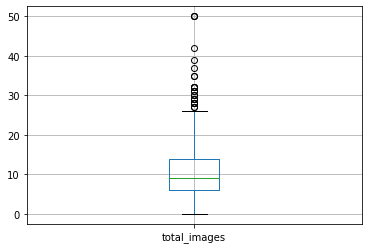

In [15]:
check = ['airports_nearest', 'balcony', 'ceiling_height', 'cityCenters_nearest', 'days_exposition', 'floor', 'floors_total', 'kitchen_area', 'last_price', 'living_area', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'rooms', 'total_area', 'total_images']

for col in check:
    plt.figure()
    data.boxplot(col)

Столбец ceiling_height точно содержит аномалии, потому что максимум высота потолков может достигать 5-6 метров. Возможны единичные исключения до 10. Стоит заполнить аномалии слишком маленьких (от 0 до 2.5 м) и больших (от 7 до 25 м) медианным значением. А выше 25 метров разделить на 10. 

<AxesSubplot:>

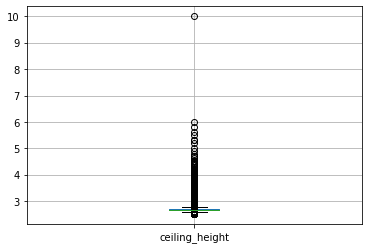

In [16]:
med = data['ceiling_height'].median() 

for i in range(len(data['ceiling_height'])):
    if 0 <= data.loc[i, 'ceiling_height'] <= 2.5 or 7 <= data.loc[i, 'ceiling_height'] <= 25:
        data.loc[i, 'ceiling_height'] = med
    elif data.loc[i, 'ceiling_height'] > 25:
        data.loc[i, 'ceiling_height'] = data.loc[i, 'ceiling_height']/10

data.boxplot('ceiling_height') #проверяем изменения

Насторожили квартиры с 10 и более комнатами. Надо проверить, сколько их всего в таблице. И возможно удалить, если они сильно не будут влиять на исследование. 

In [17]:
data.query('rooms > 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
648,3,17500000,183.7,2018-07-01,11,3.40,7,138.8,7,False,...,13.3,0,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
866,5,25000000,363.0,2017-12-23,14,3.16,5,222.0,4,False,...,16.6,0,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
5358,20,65000000,590.0,2019-02-14,15,3.50,6,409.0,3,False,...,100.0,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
9688,8,33000000,194.1,2017-02-07,11,3.43,5,129.0,2,False,...,11.9,0,Санкт-Петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0
14498,6,32250000,374.6,2018-06-09,19,2.65,5,264.5,2,False,...,27.6,0,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0
18848,6,28500000,270.0,2015-03-02,16,3.00,4,180.0,4,False,...,13.0,1,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0
19540,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,False,...,112.0,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
20829,6,28659000,245.4,2016-03-31,14,2.65,4,168.3,2,False,...,25.9,0,Санкт-Петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95.0


Всего получается 8 квартир. Среди которых в среднем комнаты должны составлять 10 м^2, что не особо реалистично. Можно удалять.

In [18]:
data = data.query('rooms <= 10')
data.query('rooms > 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


### Посчитайте и добавьте в таблицу новые столбцы

Добавляем в таблицу новые столбцы со следующими параметрами:
* цена одного квадратного метра;
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «‎первый», «последний», «другой»);
* расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [20]:
data['price_of_meter'] = data['last_price']/data['total_area']
data['day_of_week_exposition'] = data['first_day_exposition'].dt.dayofweek
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year
data['type_floor'] = np.where(data['floor'] == 1,'Первый', np.where(data['floor'] == data['floors_total'], 'Последний', 'Другой'))
data['center_km'] = round(data['cityCenters_nearest']/1000)

In [20]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_of_meter,day_of_week_exposition,month_exposition,year_exposition,type_floor,center_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,Другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,Первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,Другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,Другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,Другой,8.0


### Проведите исследовательский анализ данных

#### Изучим следующие параметры объектов

<AxesSubplot:ylabel='Frequency'>

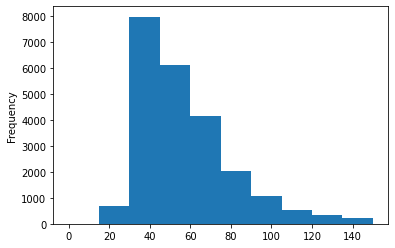

In [21]:
data['total_area'].plot(kind='hist', range=(0,150))

Большинство квартир продаются с общей площадью до 60 м^2.

<AxesSubplot:ylabel='Frequency'>

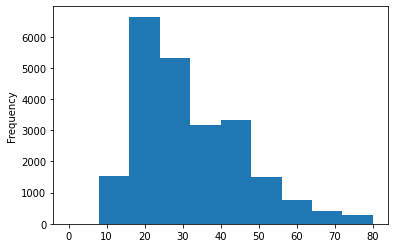

In [22]:
data['living_area'].plot(kind='hist', range=(0,80))

Практически все жилых помещенийдо 60 м^2. Самая популярная площадь - 20 м^2, выставленная на продажу. 

<AxesSubplot:ylabel='Frequency'>

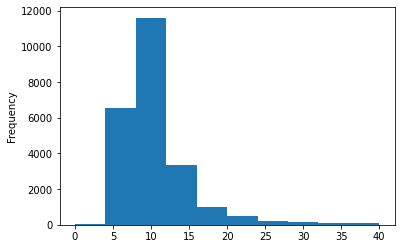

In [23]:
data['kitchen_area'].plot(kind='hist', range=(0,40))

Около 80% кухонь с площадью до 12 м^2.

<AxesSubplot:ylabel='Frequency'>

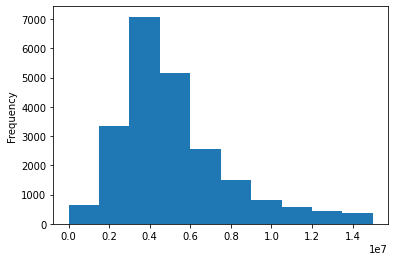

In [24]:
data['last_price'].plot(kind='hist', range=(0,15000000))

График имеет перекос в положительную сторону. Значит среднее последней цены квартиры выше медианы. 

<AxesSubplot:ylabel='Frequency'>

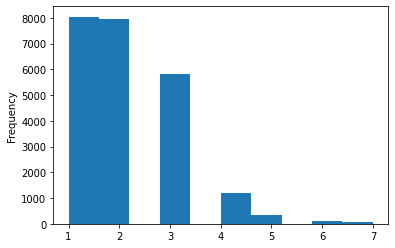

In [25]:
data['rooms'].plot(kind='hist', range=(1,7))

Чаще всего выставляют квартиры 1, 2 комнатные. На 25% меньше 3-комнатные. Остальные представлены намного меньше. 

<AxesSubplot:ylabel='Frequency'>

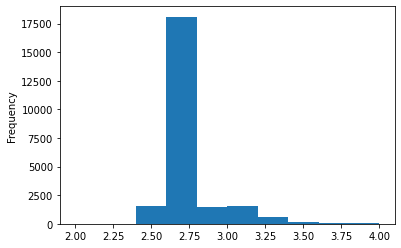

In [26]:
data['ceiling_height'].plot(kind='hist', range=(2,4))

Такой высокий пик мог получится из-за того, что сылишком маленькие и большие значения были заполнены медианой. 

<AxesSubplot:ylabel='Frequency'>

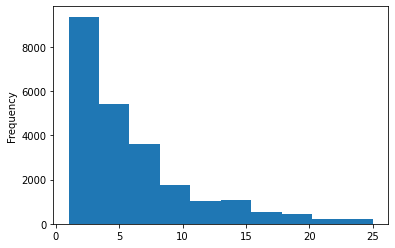

In [27]:
data['floor'].plot(kind='hist', range=(1,25))

Видимо многие предпочитают выставлять и покупать квартиры ближе к земле. Так же это может связано, что многие дома не выше 5 этажей. 

<AxesSubplot:>

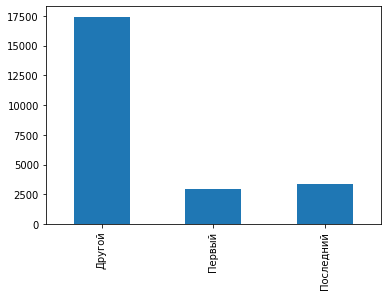

In [28]:
data['type_floor'].value_counts().sort_index().plot.bar()

Около 80% продают не первый, не последний этаж. Остальные проценты практически поровну разделились между первым и последним этажами.

<AxesSubplot:ylabel='Frequency'>

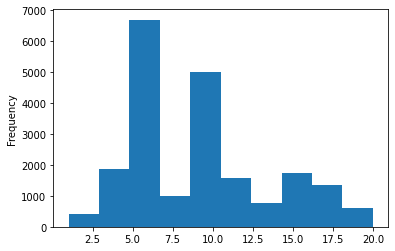

In [29]:
data['floors_total'].plot(kind='hist', range=(1,20))

Гипотеза из прошлых выводов подтвердилась. Большинство квартир с 5 этажами. Также есть и много квартир с 10 этажами и выше. Скорее всего многие из них находятся в Санкт-Петербурге.

<AxesSubplot:ylabel='Frequency'>

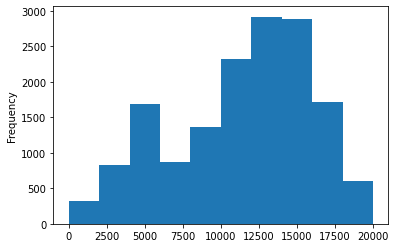

In [30]:
data['cityCenters_nearest'].plot(kind='hist', range=(0,20000))

Большая часть квартир находится в пределах 15 км от центра города. 

<AxesSubplot:ylabel='Frequency'>

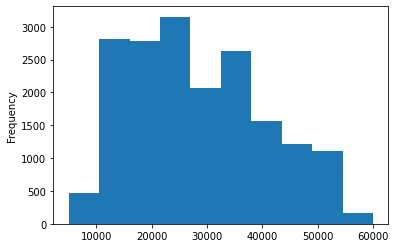

In [31]:
data['airports_nearest'].plot(kind='hist', range=(5000,60000))

Все-таки расстояние до аэропорта как всегда не маленькое, в среднем около 25 км среди всех квартир, выставленных на продажу.

<AxesSubplot:ylabel='Frequency'>

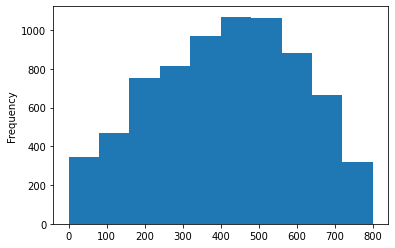

In [32]:
data['parks_nearest'].plot(kind='hist', range=(0,800))

Большинтсво квартир находятся в пешей доступности от парков. Большая часть расположена в 500 метрах. 

<AxesSubplot:>

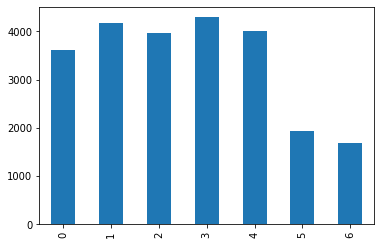

In [33]:
data['day_of_week_exposition'].value_counts().sort_index().plot.bar()

Продавцы квартир предпочитают выствлять объявления в будни. В выходные дни этот показатель проседает примерно на 50%. 

<AxesSubplot:>

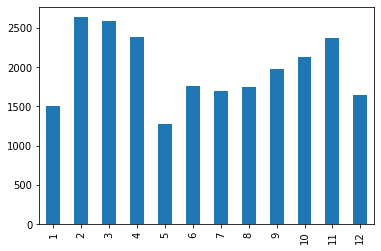

In [34]:
data['month_exposition'].value_counts().sort_index().plot.bar()

Продавцы меньше выставляют квартиры в начале и конце года, и ближе к лету. 

#### Изучение скорости продажи квартиры

<AxesSubplot:ylabel='Frequency'>

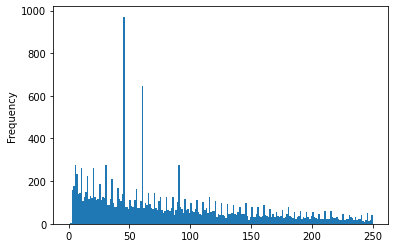

In [35]:
data['days_exposition'].plot(kind='hist', bins=200,  range=(0,250))

In [36]:
f"Среднее: {data['days_exposition'].mean()}"

'Среднее: 180.8077616888499'

In [37]:
f"Медиана: {data['days_exposition'].median()}"

'Медиана: 95.0'

<AxesSubplot:>

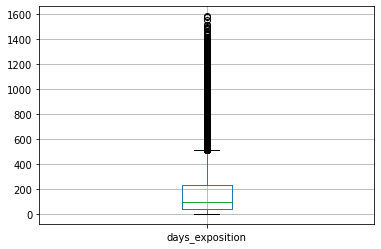

In [17]:
data.boxplot('days_exposition')

In [18]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Нормальным временем для совершения сделок можно считать около 3 месяцев. Однако наша гистограмма смещена влево и у нее присутсвуют выбросы, поэтому неудивительно, что среднее отличется почти в 2 раза. Быстрыми можно считать сделаками, совершенными за 30-40 дней (то есть около месяца). Необычно долгими скорее те, что превышают 8 месяцев и далее (там лежит меньше 25% совершенных продаж). 

#### Влияние на общую стоимость объекта

Зависит ли цена от:
* общей площади;
* жилой площади;
* площади кухни;
* количества комнат;
* этажа, на котором расположена квартира (первый, последний, другой);
* даты размещения (день недели, месяц, год).

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

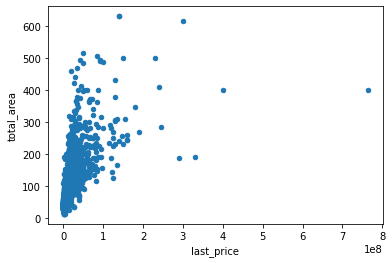

In [38]:
data.plot(x='last_price', y='total_area', kind='scatter')

In [39]:
data['last_price'].corr(data['total_area'])

0.6436904608549995

Есть корреляция между общей площадью и финальной ценой на квартиру. 

<AxesSubplot:xlabel='last_price', ylabel='living_area'>

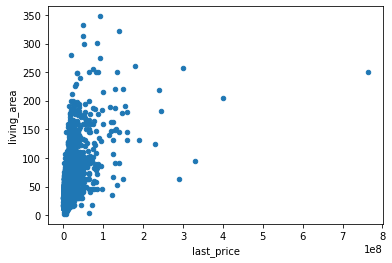

In [40]:
data.plot(x='last_price', y='living_area', kind='scatter')

In [41]:
data['last_price'].corr(data['living_area'])

0.5488948251405037

Небольшая корреляция между жилой площадью и финальной ценой на квартиру есть.

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

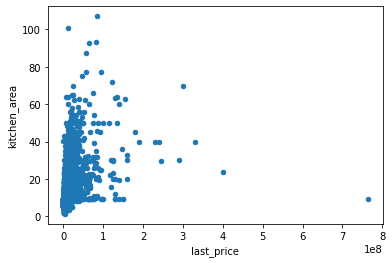

In [42]:
data.plot(x='last_price', y='kitchen_area', kind='scatter')

In [43]:
data['last_price'].corr(data['kitchen_area'])

0.425976674407798

Корреляции между площадью кухни и финальной ценой на квартиру практически нет.

<AxesSubplot:xlabel='last_price', ylabel='rooms'>

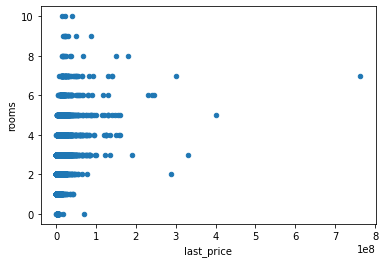

In [44]:
data.plot(x='last_price', y='rooms', kind='scatter')

In [45]:
data['last_price'].corr(data['rooms'])

0.3593752010028248

Корреляции между количеством комнат и финальной ценой на квартиру нет.

<BarContainer object of 23691 artists>

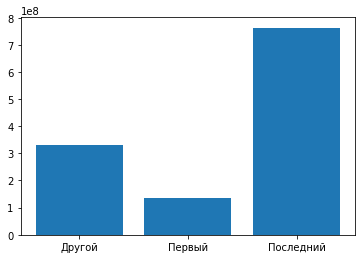

In [47]:
plt.bar(data['type_floor'], data['last_price'])

На последнем этаже продают квартиры за более выскую цену. 

<BarContainer object of 23691 artists>

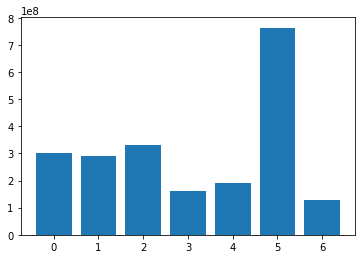

In [48]:
plt.bar(data['day_of_week_exposition'], data['last_price'])

В субботу выставляются более высокие по стоимости квартиры.

<BarContainer object of 23691 artists>

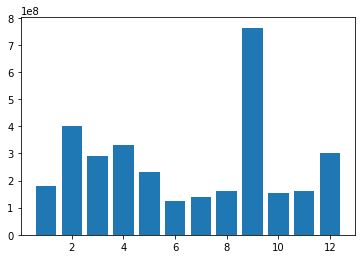

In [49]:
plt.bar(data['month_exposition'], data['last_price'])

В сентября после отдыха многие выставляют свои квартиры и стоимость на них повышается.

<BarContainer object of 23691 artists>

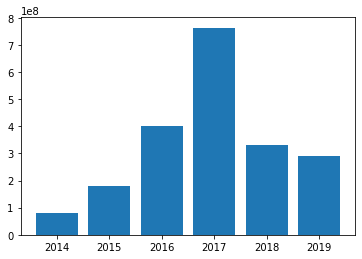

In [50]:
plt.bar(data['year_exposition'], data['last_price'])

В 2017 заметный рост продаж и стоимости квартир. 

#### Средняя цена 1 м^2 в 10 населённых пунктах с наибольшим числом объявлений

In [29]:
avg_price_meter = pd.pivot_table(data, index='locality_name', values='price_of_meter', aggfunc={'mean', 'count', 'median'}).sort_values('count', ascending=False)
avg_price_meter.head(10)

,count,mean,median
locality_name,,,
Санкт-Петербург,15721,114849.008794,104761.904762
Мурино,590,86087.512050,86175.643522
Кудрово,472,95324.930544,95675.473579
Шушары,440,78677.364217,76876.172608
Всеволожск,398,68654.473986,65789.473684
Пушкин,369,103125.819291,100000.000000
Колпино,338,75424.579098,74723.748474
Парголово,327,90175.913458,91642.857143
Гатчина,307,68746.146763,67796.610169


In [52]:
avg_price_meter = avg_price_meter.sort_values('mean', ascending=False)
avg_price_meter.head(1)

,count,mean
locality_name,,
Зеленогорск,24,115122.799198


Самая высокая цена за квадратный метр принадлежит Зеленогорску. 

In [53]:
avg_price_meter.tail(1)

,count,mean
locality_name,,
Старополье,3,11206.221198


Самая низкая цена за квадратный метр принадлежит Старополью. 

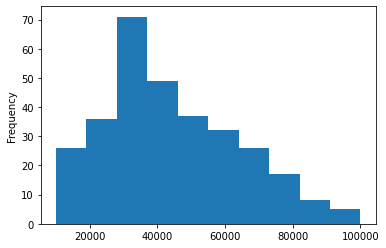

In [43]:
avg_price_meter['median'].plot(kind='hist', range=(10000,100000));

Преобладают квартиры с медианным значением по городам около 30000 рублей за 1 м^2.

#### Зависимость стоимости объектов от расстояния до центра города

In [54]:
price_center = data.loc[data['locality_name']=='Санкт-Петербург'].pivot_table(index='center_km', values='last_price')
price_center['last_price'] = price_center['last_price']/1000000
price_center

,last_price
center_km,
0.0,31.449116
1.0,21.144976
2.0,17.753139
3.0,11.108319
4.0,13.254511
5.0,14.444169
6.0,15.338418
7.0,14.775153
8.0,9.243289


Чем больше расстояние от центра города, тем дешевле стоит квартира. 

<AxesSubplot:xlabel='distance', ylabel='last_price'>

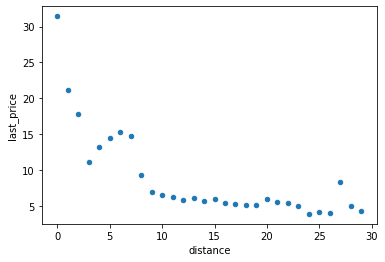

In [55]:
price_center['distance'] = price_center.index
price_center.plot(y='last_price', x='distance', kind='scatter')

In [56]:
price_center['last_price'].corr(price_center['distance'])

-0.7583920930908431

Это подтверждается и графиком, и сильной отрицательной корреляцией. 

In [25]:
data.query('center_km == 27')['locality_name']

109            Пушкин
140            Пушкин
439            Пушкин
556            Пушкин
558      Металлострой
             ...     
22503          Пушкин
22544    Красное Село
22619          Пушкин
23286    Металлострой
23438          Пушкин
Name: locality_name, Length: 104, dtype: object

In [27]:
data.query('center_km == 27 and locality_name == "Пушкин"')['last_price'].mean()

7033950.0

### Общий вывод

В течение исследования сделаны основные шаги предобработки данных - заполнены пропуски, удалены аномальные значения, обработаны дубликаты, категоризированы данные нескольких столбцов. Добавлены новые значения в таблицу и проведен исследовательский анализ.

По полученным данным можно сказать, что средняя квартира для Петербурга и его окрестностей - с общей площадью 40-50 м^2, 20-30 м^2 из котрых занимает жилая площадь и 10 м^2 - кухня. Многие предпочитают покупать 1 и 2-комнатные квартиры, реже 3 комнатные. Чаще всего встречаются предложения о продаже в 5 и 10 этажных домах. Большое количество квартир расположено в 10-25 км от центра города, практически во всех есть парк в пешей доступности.

* Нормальным временем для совершения сделок можно считать около 3 месяцев. Быстрыми можно считать сделаками, совершенными за 30-40 дней. Необычно долгими скорее те, что превышают 8 месяцев. 
* Есть корреляция между общей площадью и финальной ценой на квартиру. В частности, присутсвует корреляция между жилой площадью и финальной ценой.
* 